<a href="https://colab.research.google.com/github/rich-hyun/Kuggle_9th_team_SAMTARBUCKS/blob/main/Starbucks_EDA_coffe_taste_sort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from datetime import datetime
import calendar

# 데이터 로딩
df = pd.read_csv('https://raw.githubusercontent.com/rich-hyun/Kuggle_9th_team_/main/reviews_data.csv',  encoding='utf-8')

# 'Date' 열에서 월, 일, 연도를 추출하여 새로운 열에 저장
# 'Reviewed' 다음에 오는 단어를 'mnth' 열에 저장
df['mnth'] = df['Date'].str.extract(r'Reviewed\s+([A-Za-z]+)')
df['day'] = df['Date'].str.extract(r'(\d{1,2}),').astype('int')
df['year'] = df['Date'].str.extract(r'(\d{4})').astype('int')

# 월 이름을 숫자로 매핑하는 딕셔너리 생성
months_map = {
    'Jan': 1, 'Feb': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'Aug': 8, 'Sept': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

# 'mnth' 열의 월 이름을 숫자로 변환
df['mnth_num'] = df['mnth'].map(months_map)

# 월 이름을 숫자로 매핑하는 딕셔너리 생성
month_mapping = {v: k for k,v in enumerate(calendar.month_name)}

# 월 이름을 월 번호로 변환
df['month_num'] = df['mnth'].map(month_mapping)

# 날짜로부터 요일을 계산하여 'day2' 열에 저장
df['day2'] = df.apply(lambda row: datetime.strptime(f"{row['year']}-{row['mnth_num']}-{row['day']}", '%Y-%m-%d').strftime('%A'), axis=1)

# 요일 이름을 숫자로 매핑하는 딕셔너리 생성
day_to_num = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

# 'day2' 열의 요일 이름을 숫자로 변환
df['day2_num'] = df['day2'].map(day_to_num)

# 원하는 열만 선택 (새로운 'day2_num' 열을 포함하도록 업데이트)
df = df[['name', 'location', 'Date', 'year', 'mnth_num', 'day', 'day2_num', 'Rating', 'Review']]
# 'Rating' 또는 'Review'가 NaN인 행을 제거
df.dropna(subset=['Rating', 'Review'], inplace = True)

<ipython-input-1-7ef3b7b2243a>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Rating', 'Review'], inplace = True)


In [4]:
df.head()

,name,location,Date,year,mnth_num,day,day2_num,Rating,Review
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",2023,9,13,2,5.0,Amber and LaDonna at the Starbucks on Southwes...
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",2023,7,16,6,5.0,** at the Starbucks by the fire station on 436...
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",2023,7,5,2,5.0,I just wanted to go out of my way to recognize...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",2023,5,26,4,5.0,Me and my friend were at Starbucks and my card...
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",2023,1,22,6,5.0,I?셫 on this kick of drinking 5 cups of warm wa...


**EDA**

In [5]:
df

,name,location,Date,year,mnth_num,day,day2_num,Rating,Review
0,Helen,"Wichita Falls, TX","Reviewed Sept. 13, 2023",2023,9,13,2,5.0,Amber and LaDonna at the Starbucks on Southwes...
1,Courtney,"Apopka, FL","Reviewed July 16, 2023",2023,7,16,6,5.0,** at the Starbucks by the fire station on 436...
2,Daynelle,"Cranberry Twp, PA","Reviewed July 5, 2023",2023,7,5,2,5.0,I just wanted to go out of my way to recognize...
3,Taylor,"Seattle, WA","Reviewed May 26, 2023",2023,5,26,4,5.0,Me and my friend were at Starbucks and my card...
4,Tenessa,"Gresham, OR","Reviewed Jan. 22, 2023",2023,1,22,6,5.0,I?셫 on this kick of drinking 5 cups of warm wa...
5,Alyssa,"Sunnyvale, TX","Reviewed Sept. 14, 2023",2023,9,14,3,1.0,We had to correct them on our order 3 times. T...
6,ken,"Spring Hill, FL","Reviewed Sept. 8, 2023",2023,9,8,4,1.0,I have tried Starbucks several different times...
7,Nikki,"Asheville, NC","Reviewed Aug. 25, 2023",2023,8,25,4,1.0,Starbucks near me just launched new fall foods...
8,Alex,"Reisterstown, MD","Reviewed Aug. 5, 2023",2023,8,5,5,1.0,"I ordered online for the Reisterstown Rd, St T..."
9,Sunny,"Zionville, Other","Reviewed Aug. 4, 2023",2023,8,4,4,1.0,Staff at the Smythe St. Superstore location in...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 701 entries, 0 to 745
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      701 non-null    object 
 1   location  701 non-null    object 
 2   Date      701 non-null    object 
 3   year      701 non-null    int64  
 4   mnth_num  701 non-null    int64  
 5   day       701 non-null    int64  
 6   day2_num  701 non-null    int64  
 7   Rating    701 non-null    float64
 8   Review    701 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 54.8+ KB


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

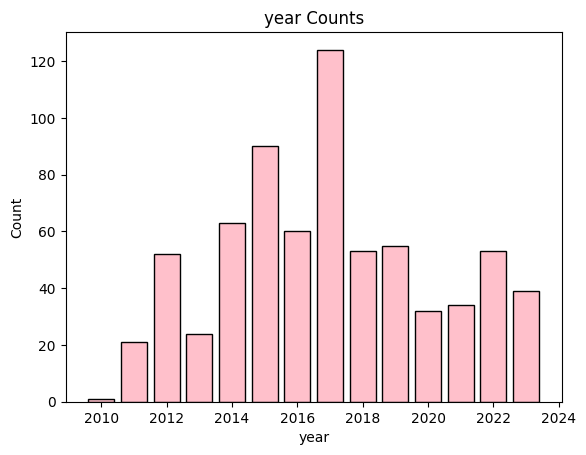

In [33]:
rating_counts = df['year'].value_counts()

plt.bar(rating_counts.index, rating_counts.values, color='pink', edgecolor='black')

plt.title('year Counts')
plt.xlabel('year')
plt.ylabel('Count')

plt.show()

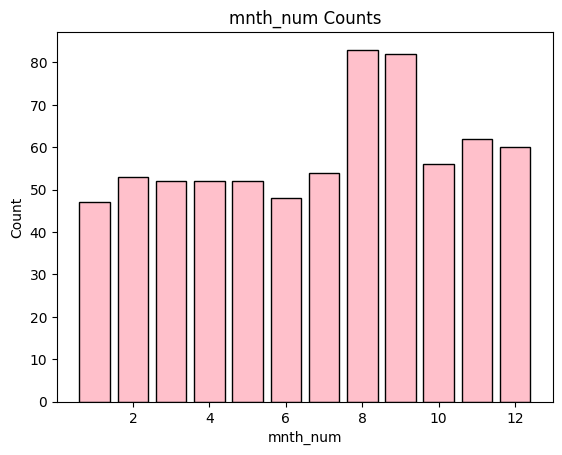

In [31]:
rating_counts = df['mnth_num'].value_counts()

plt.bar(rating_counts.index, rating_counts.values, color='pink', edgecolor='black')

plt.title('mnth_num Counts')
plt.xlabel('mnth_num')
plt.ylabel('Count')

plt.show()

In [34]:
unique_ratings = df['Rating'].unique()
print(unique_ratings)

[5. 1. 2. 3. 4.]


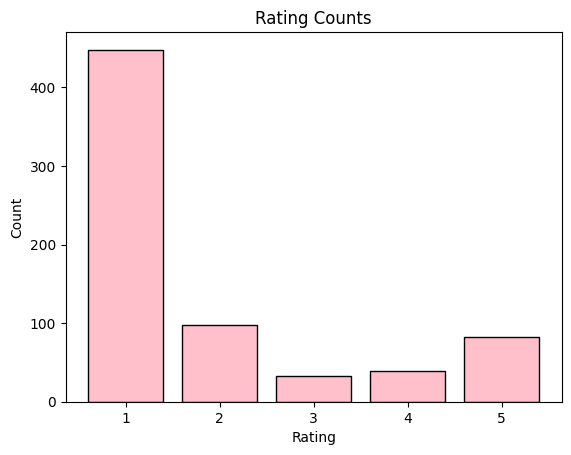

In [12]:
rating_counts = df['Rating'].value_counts()

plt.bar(rating_counts.index, rating_counts.values, color='pink', edgecolor='black')

plt.title('Rating Counts')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.show()

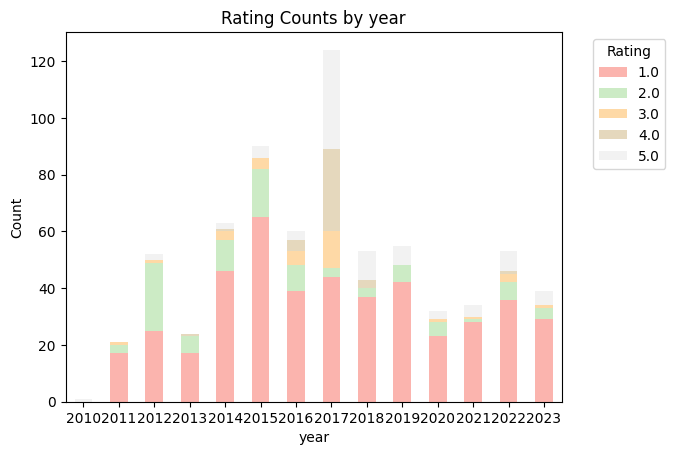

In [36]:
## year에 따른 Rating 분포 확인

rating_counts_by_year = df.groupby('year')['Rating'].value_counts().unstack(fill_value=0)

rating_counts_by_year.plot(kind='bar', stacked=True, colormap='Pastel1')

plt.title('Rating Counts by year')
plt.xlabel('year')
plt.ylabel('Count')

plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

plt.show()

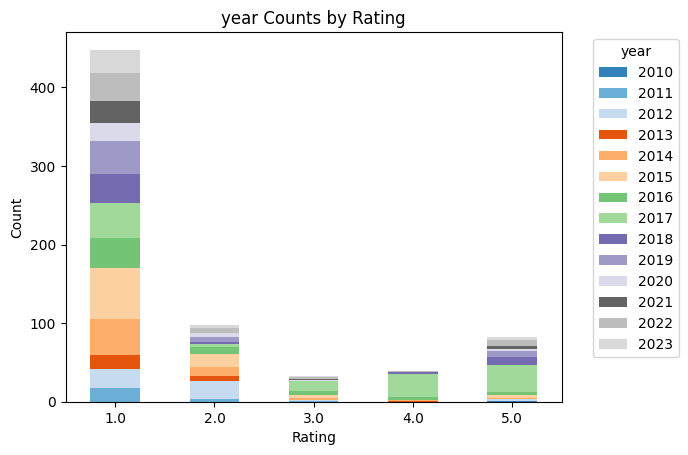

In [41]:
## 각각의 Rating에 따른 year 분포 확인

rating_counts_by_year = df.groupby('Rating')['year'].value_counts().unstack(fill_value=0)

ax = rating_counts_by_year.plot(kind='bar', stacked=True, colormap='tab20c')

plt.title('year Counts by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.legend(title='year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

plt.show()

## 높은 Rating(4,5)의 경우 2017년의 비중이 매우 높은 것으로 확인

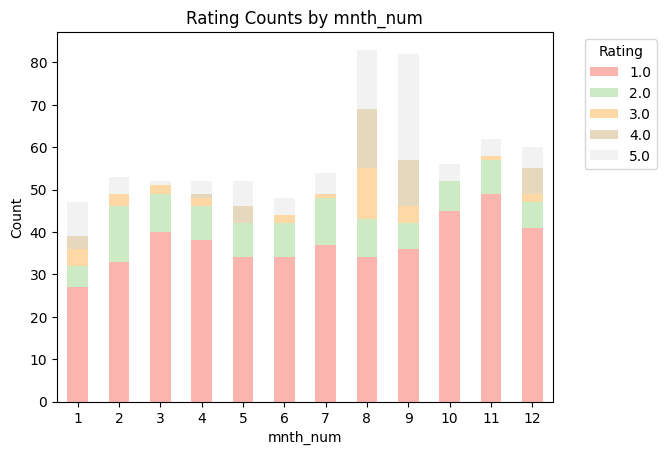

In [42]:
## mnth_num에 따른 Rating 분포 확인

rating_counts_by_month = df.groupby('mnth_num')['Rating'].value_counts().unstack(fill_value=0)

rating_counts_by_month.plot(kind='bar', stacked=True, colormap='Pastel1')

plt.title('Rating Counts by mnth_num')
plt.xlabel('mnth_num')
plt.ylabel('Count')

plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

plt.show()

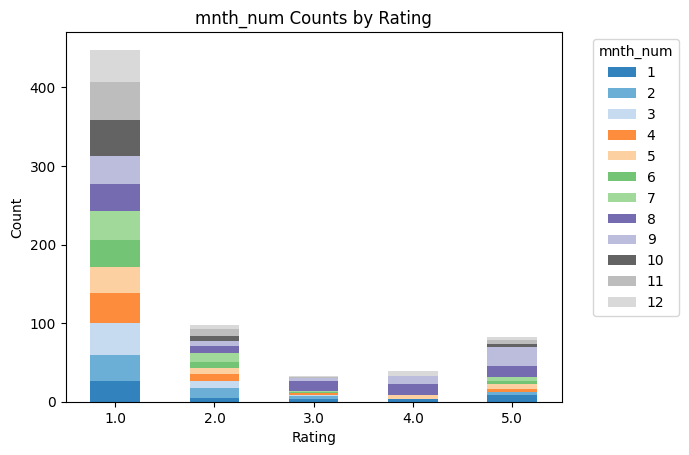

In [43]:
## 각각의 Rating에 따른 mnth_num 분포 확인

rating_counts_by_month = df.groupby('Rating')['mnth_num'].value_counts().unstack(fill_value=0)

ax = rating_counts_by_month.plot(kind='bar', stacked=True, colormap='tab20c')

plt.title('mnth_num Counts by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.legend(title='mnth_num', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

plt.show()

## Rating=1,2인 경우 mnth_num별 비중이 비슷하지만 Rating=3,4,5인 경우 mnth_num=8,9의 비중이 높은 걸 확인할 수 있음

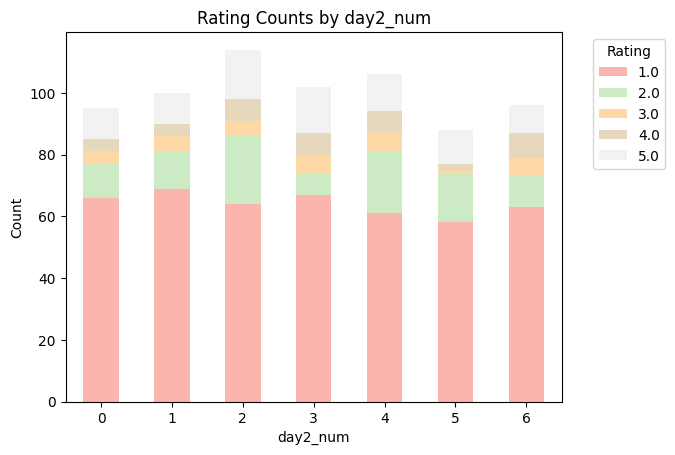

In [25]:
## day2_num에 따른 Rating 분포 확인

rating_counts_by_day = df.groupby('day2_num')['Rating'].value_counts().unstack(fill_value=0)

rating_counts_by_day.plot(kind='bar', stacked=True, colormap='Pastel1')

plt.title('Rating Counts by day2_num')
plt.xlabel('day2_num')
plt.ylabel('Count')

plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

plt.show()

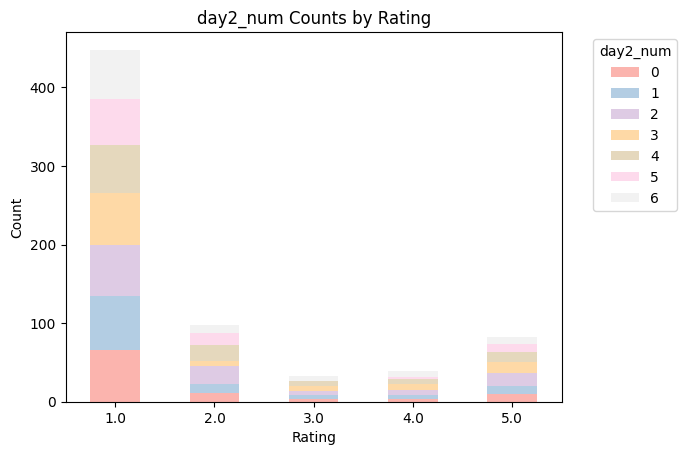

In [35]:
## 각각의 Rating에 따른 day2_num 분포 확인

rating_counts_by_day = df.groupby('Rating')['day2_num'].value_counts().unstack(fill_value=0)

ax = rating_counts_by_day.plot(kind='bar', stacked=True, colormap='Pastel1')

plt.title('day2_num Counts by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.legend(title='day2_num', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

plt.show()

## 어느 특정 요일에 어떤 Rating 값이 늘어난다거나 줄어드다는 등의 관계는 없는 것으로 확인

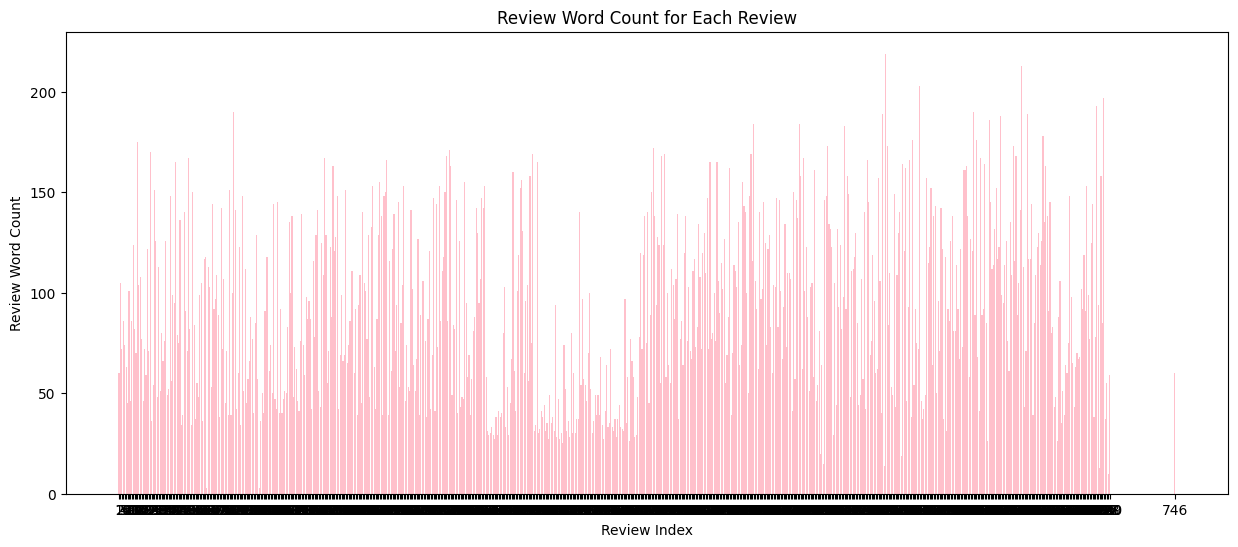

In [53]:
## Review 길이 그래프(띄어쓰기 기준 단어의 개수로 length를 측정)

df['Review_Word_Count'] = df['Review'].apply(lambda x: len(x.split()))

plt.figure(figsize=(15, 6))
plt.bar(df.index, df['Review_Word_Count'], color='pink')

plt.title('Review Word Count for Each Review')
plt.xlabel('Review Index')
plt.ylabel('Review Word Count')

plt.xticks(df.index, [f'{i+1}' for i in df.index])

plt.show()

In [52]:
df['Review_Word_Count'] = df['Review'].apply(lambda x: len(x.split()))

# 최대값과 최소값 출력
max_word_count = df['Review_Word_Count'].max()
min_word_count = df['Review_Word_Count'].min()

print(max_word_count)
print(min_word_count)

219
3


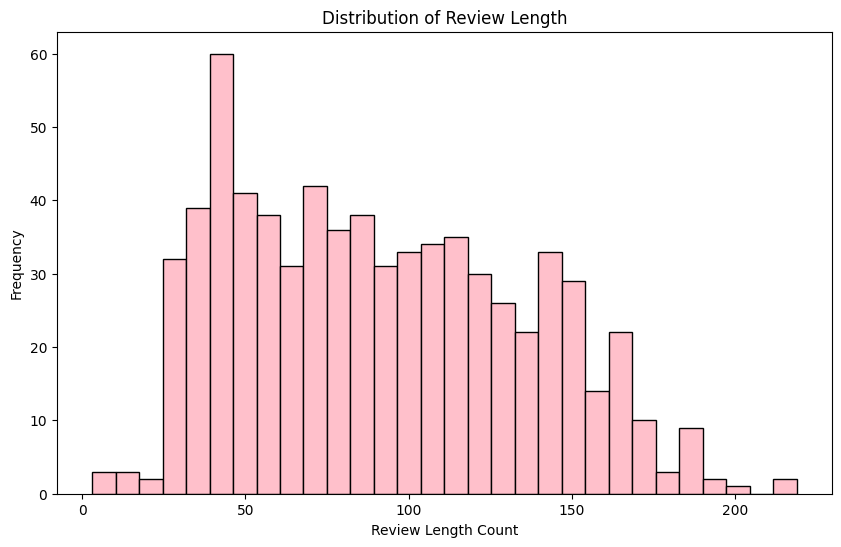

In [54]:
df['Review_Word_Count'] = df['Review'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
plt.hist(df['Review_Word_Count'], bins=30, color='pink', edgecolor='black')

plt.title('Distribution of Review Length')
plt.xlabel('Review Length Count')
plt.ylabel('Frequency')

plt.show()

**커피 맛&종류 관련 Review 행 번호 추출**

In [55]:
!pip install nltk

In [59]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# 리뷰 데이터에서 단어 추출 및 불용어 제외
stop_words = set(stopwords.words('english'))
filtered_words = [word.lower() for review in df['Review'] for word in word_tokenize(str(review)) if word.lower() not in stop_words and len(word) > 1]

# 단어의 빈도 계산
fdist = FreqDist(filtered_words)

# 가장 많이 나오는 상위 100개 단어 출력
top_words = fdist.most_common(100)
print()
for word, frequency in top_words:
    print(f"{word}: {frequency}번")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



starbucks: 936번
coffee: 497번
n't: 331번
customer: 259번
get: 251번
service: 240번
drink: 237번
store: 224번
's: 219번
one: 214번
time: 203번
order: 195번
like: 194번
go: 193번
``: 188번
'': 183번
said: 178번
would: 177번
card: 172번
went: 149번
back: 143번
always: 135번
told: 132번
asked: 125번
never: 125번
got: 123번
ordered: 122번
manager: 113번
even: 113번
day: 108번
could: 107번
customers: 106번
cup: 103번
money: 102번
location: 101번
...: 99번
good: 97번
going: 96번
people: 94번
employees: 94번
every: 90번
way: 89번
drinks: 85번
times: 85번
make: 84번
know: 84번
give: 82번
years: 80번
'm: 78번
great: 77번
food: 75번
really: 74번
want: 73번
made: 72번
new: 72번
morning: 70번
work: 69번
staff: 68번
first: 68번
ca: 68번
today: 67번
also: 67번
've: 67번
called: 66번
two: 66번
last: 65번
rude: 65번
milk: 65번
free: 64번
experience: 63번
place: 63번
barista: 63번
see: 61번
use: 60번
another: 58번
right: 57번
us: 57번
line: 57번
take: 56번
well: 56번
hot: 55번
company: 54번
much: 52번
caramel: 52번
tea: 52번
stars: 51번
put: 51번
drive: 51번
name: 51번
took: 50번
minutes: 

In [67]:
## 맛에 관련된 Review 행 번호 추출

taste_keywords = [
    'taste', 'flavor', 'delicious', 'yummy', 'tasty', 'tastes', 'flavour', 'tasting',
    'savor', 'palate', 'savory', 'delectable', 'mouthwatering', 'scrumptious', 'appetizing',
    'rich', 'zingy', 'zesty', 'sour', 'sweet', 'bitter', 'salty', 'tangy',
    'aromatic', 'spicy', 'mild', 'strong', 'weak', 'robust', 'smooth', 'creamy',
    'refreshing', 'crisp', 'bland', 'satisfying', 'bouquet', 'full-bodied',
    'invigorating', 'pungent', 'silky', 'velvety', 'gritty', 'sharp', 'harsh',
    'bouquet', 'fragrant', 'herbal', 'spiced', 'complex', 'balanced', 'astringent'
]

rows_with_taste = df[df['Review'].str.contains('|'.join(taste_keywords), case=False)]

print("맛에 관련된 리뷰의 행 번호:")
print(rows_with_taste.index.tolist())

맛에 관련된 리뷰의 행 번호:
[1, 6, 9, 25, 35, 36, 44, 51, 64, 73, 74, 79, 87, 89, 94, 107, 111, 113, 124, 131, 134, 135, 142, 143, 144, 145, 150, 161, 165, 169, 179, 180, 189, 204, 205, 211, 214, 224, 232, 235, 248, 253, 264, 267, 271, 272, 274, 277, 286, 288, 297, 299, 300, 301, 306, 308, 313, 325, 329, 330, 332, 342, 343, 344, 346, 350, 355, 357, 364, 376, 377, 378, 388, 395, 396, 401, 411, 415, 417, 423, 426, 428, 429, 434, 439, 442, 461, 464, 469, 476, 483, 489, 493, 498, 529, 540, 547, 559, 560, 562, 573, 574, 576, 585, 588, 593, 597, 599, 607, 619, 622, 626, 631, 636, 637, 649, 664, 667, 671, 684, 691, 745]


In [66]:
## 커피 종에 관련된 Review 행 번호 추출

coffee_keywords += [
    'iced americano', 'iced latte', 'iced espresso', 'iced cappuccino', 'iced mocha',
    'iced macchiato', 'iced affogato', 'iced cortado', 'iced flat white', 'iced cold brew',
    'iced nitro cold brew', 'iced pour over', 'iced frappuccino', 'iced black coffee',
    'iced white coffee', 'iced java', 'iced brew', 'iced drip coffee', 'iced filter coffee',
    'iced single origin', 'iced ristretto', 'iced lungo', 'iced red eye', 'iced black eye',
    'iced long black', 'iced short black', 'iced turkish coffee', 'iced greek coffee',
    'iced vienna coffee', 'iced irish coffee', 'iced bulletproof coffee', 'iced cubano',
    'iced caramel macchiato', 'iced caramel latte', 'iced vanilla latte', 'iced vanilla coffee',
    'iced cinnamon coffee', 'iced cinnamon latte', 'iced pumpkin spice latte',
    'decaf coffee', 'decaffeinated coffee', 'half-caf coffee', 'half-caff coffee'
]

# 특정 커피 종류에 대한 리뷰를 포함한 행을 찾기
rows_with_coffee = df[df['Review'].str.contains('|'.join(coffee_keywords), case=False)]

# 결과 출력
print("커피 종류에 관련된 리뷰의 행 번호:")
print(rows_with_coffee.index.tolist())

커피 종류에 관련된 리뷰의 행 번호:
[0, 2, 4, 5, 6, 8, 9, 11, 13, 14, 16, 19, 20, 21, 24, 25, 29, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 45, 46, 47, 49, 51, 52, 57, 60, 61, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 78, 79, 80, 81, 82, 84, 87, 89, 90, 91, 93, 94, 96, 97, 98, 101, 103, 104, 105, 106, 107, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 121, 123, 124, 125, 126, 127, 129, 130, 131, 132, 134, 135, 137, 142, 143, 144, 145, 148, 150, 152, 153, 154, 155, 159, 164, 165, 166, 167, 168, 169, 171, 172, 174, 175, 176, 179, 180, 184, 185, 187, 189, 191, 193, 195, 197, 198, 199, 200, 202, 204, 206, 207, 212, 213, 214, 215, 217, 218, 220, 221, 223, 224, 226, 227, 230, 231, 233, 234, 235, 236, 239, 244, 245, 247, 248, 250, 252, 256, 257, 258, 262, 263, 264, 265, 266, 267, 268, 271, 272, 273, 274, 276, 277, 278, 279, 281, 282, 283, 284, 285, 286, 288, 290, 292, 294, 295, 298, 300, 301, 302, 304, 307, 309, 310, 311, 313, 314, 318, 319, 322, 323, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334